# BREAST-CANCER-PREDICTOR


## Life Cycle Of this Project

 - Understanding the problem statement
 - Data collection
 - Exploratory data analysis
 - Data Pre-Processing
 - Model Traning 
 - Choosing the best model

## 1) Problem Statement

- Predicting the type of tumor (Cancerous or Non-cancerous) in patient on the basis of features that are obtained from the biopsy of breast tumor tissue samples of 569 patients.


## 2) Data Collection

- Dataset Source-https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
- The data consists of 32 columns and 569 rows.

### 2.1 Importing Data and Required Packages

- Importing Pandas, NumPy, Matplotlib and Seaborn Libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

- Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv(r"C:\Users\kanis\Desktop\Breast-Cancer-Prediction\notebook\raw.csv")

### 2.2 Getting some insights of Data

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.shape

(569, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The type of data in all the columns can be deduced from the above representation

In [7]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

No null values are obtained

In [9]:
df.duplicated().sum()

np.int64(0)

No duplicated rows are obtained

- Dropping unwanted Column

In [10]:
df.drop(["id"],axis=1,inplace = True)

- Converting the Categorical Data of Diagnosis Column into Numerical Data

In [11]:
df = df.replace({"M":1,"B":0})

C:\Users\kanis\AppData\Local\Temp\ipykernel_6348\1200107492.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"M":1,"B":0})


### 2.3 Visualizing Data

- Counts of Cancerous VS Non-Cancerous Tumor

C:\Users\kanis\AppData\Local\Temp\ipykernel_6348\3308019583.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df["diagnosis"],palette=["red","orange"])
C:\Users\kanis\AppData\Local\Temp\ipykernel_6348\3308019583.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["M(cancerous)","B(non-cancerous)"])


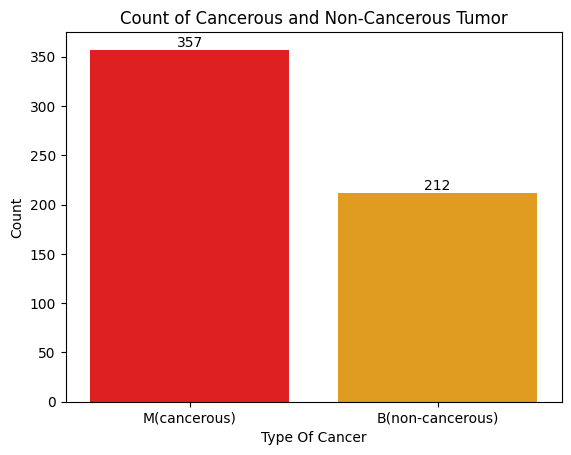

In [12]:
ax = sns.countplot(x = df["diagnosis"],palette=["red","orange"])
for bars in ax.containers:
    ax.bar_label(bars)
ax.set_xticklabels(["M(cancerous)","B(non-cancerous)"])
plt.xlabel("Type Of Cancer")
plt.ylabel("Count")
plt.title("Count of Cancerous and Non-Cancerous Tumor")
plt.show()

- Seperating out Mean Features from the DataFrame

In [13]:
mean_features = df.loc[:,"radius_mean":"fractal_dimension_mean"]
mean_features["diagnosis"]=df["diagnosis"]

- Plotting Pairplots of Mean Features

C:\Users\kanis\AppData\Local\Temp\ipykernel_6348\1223309542.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


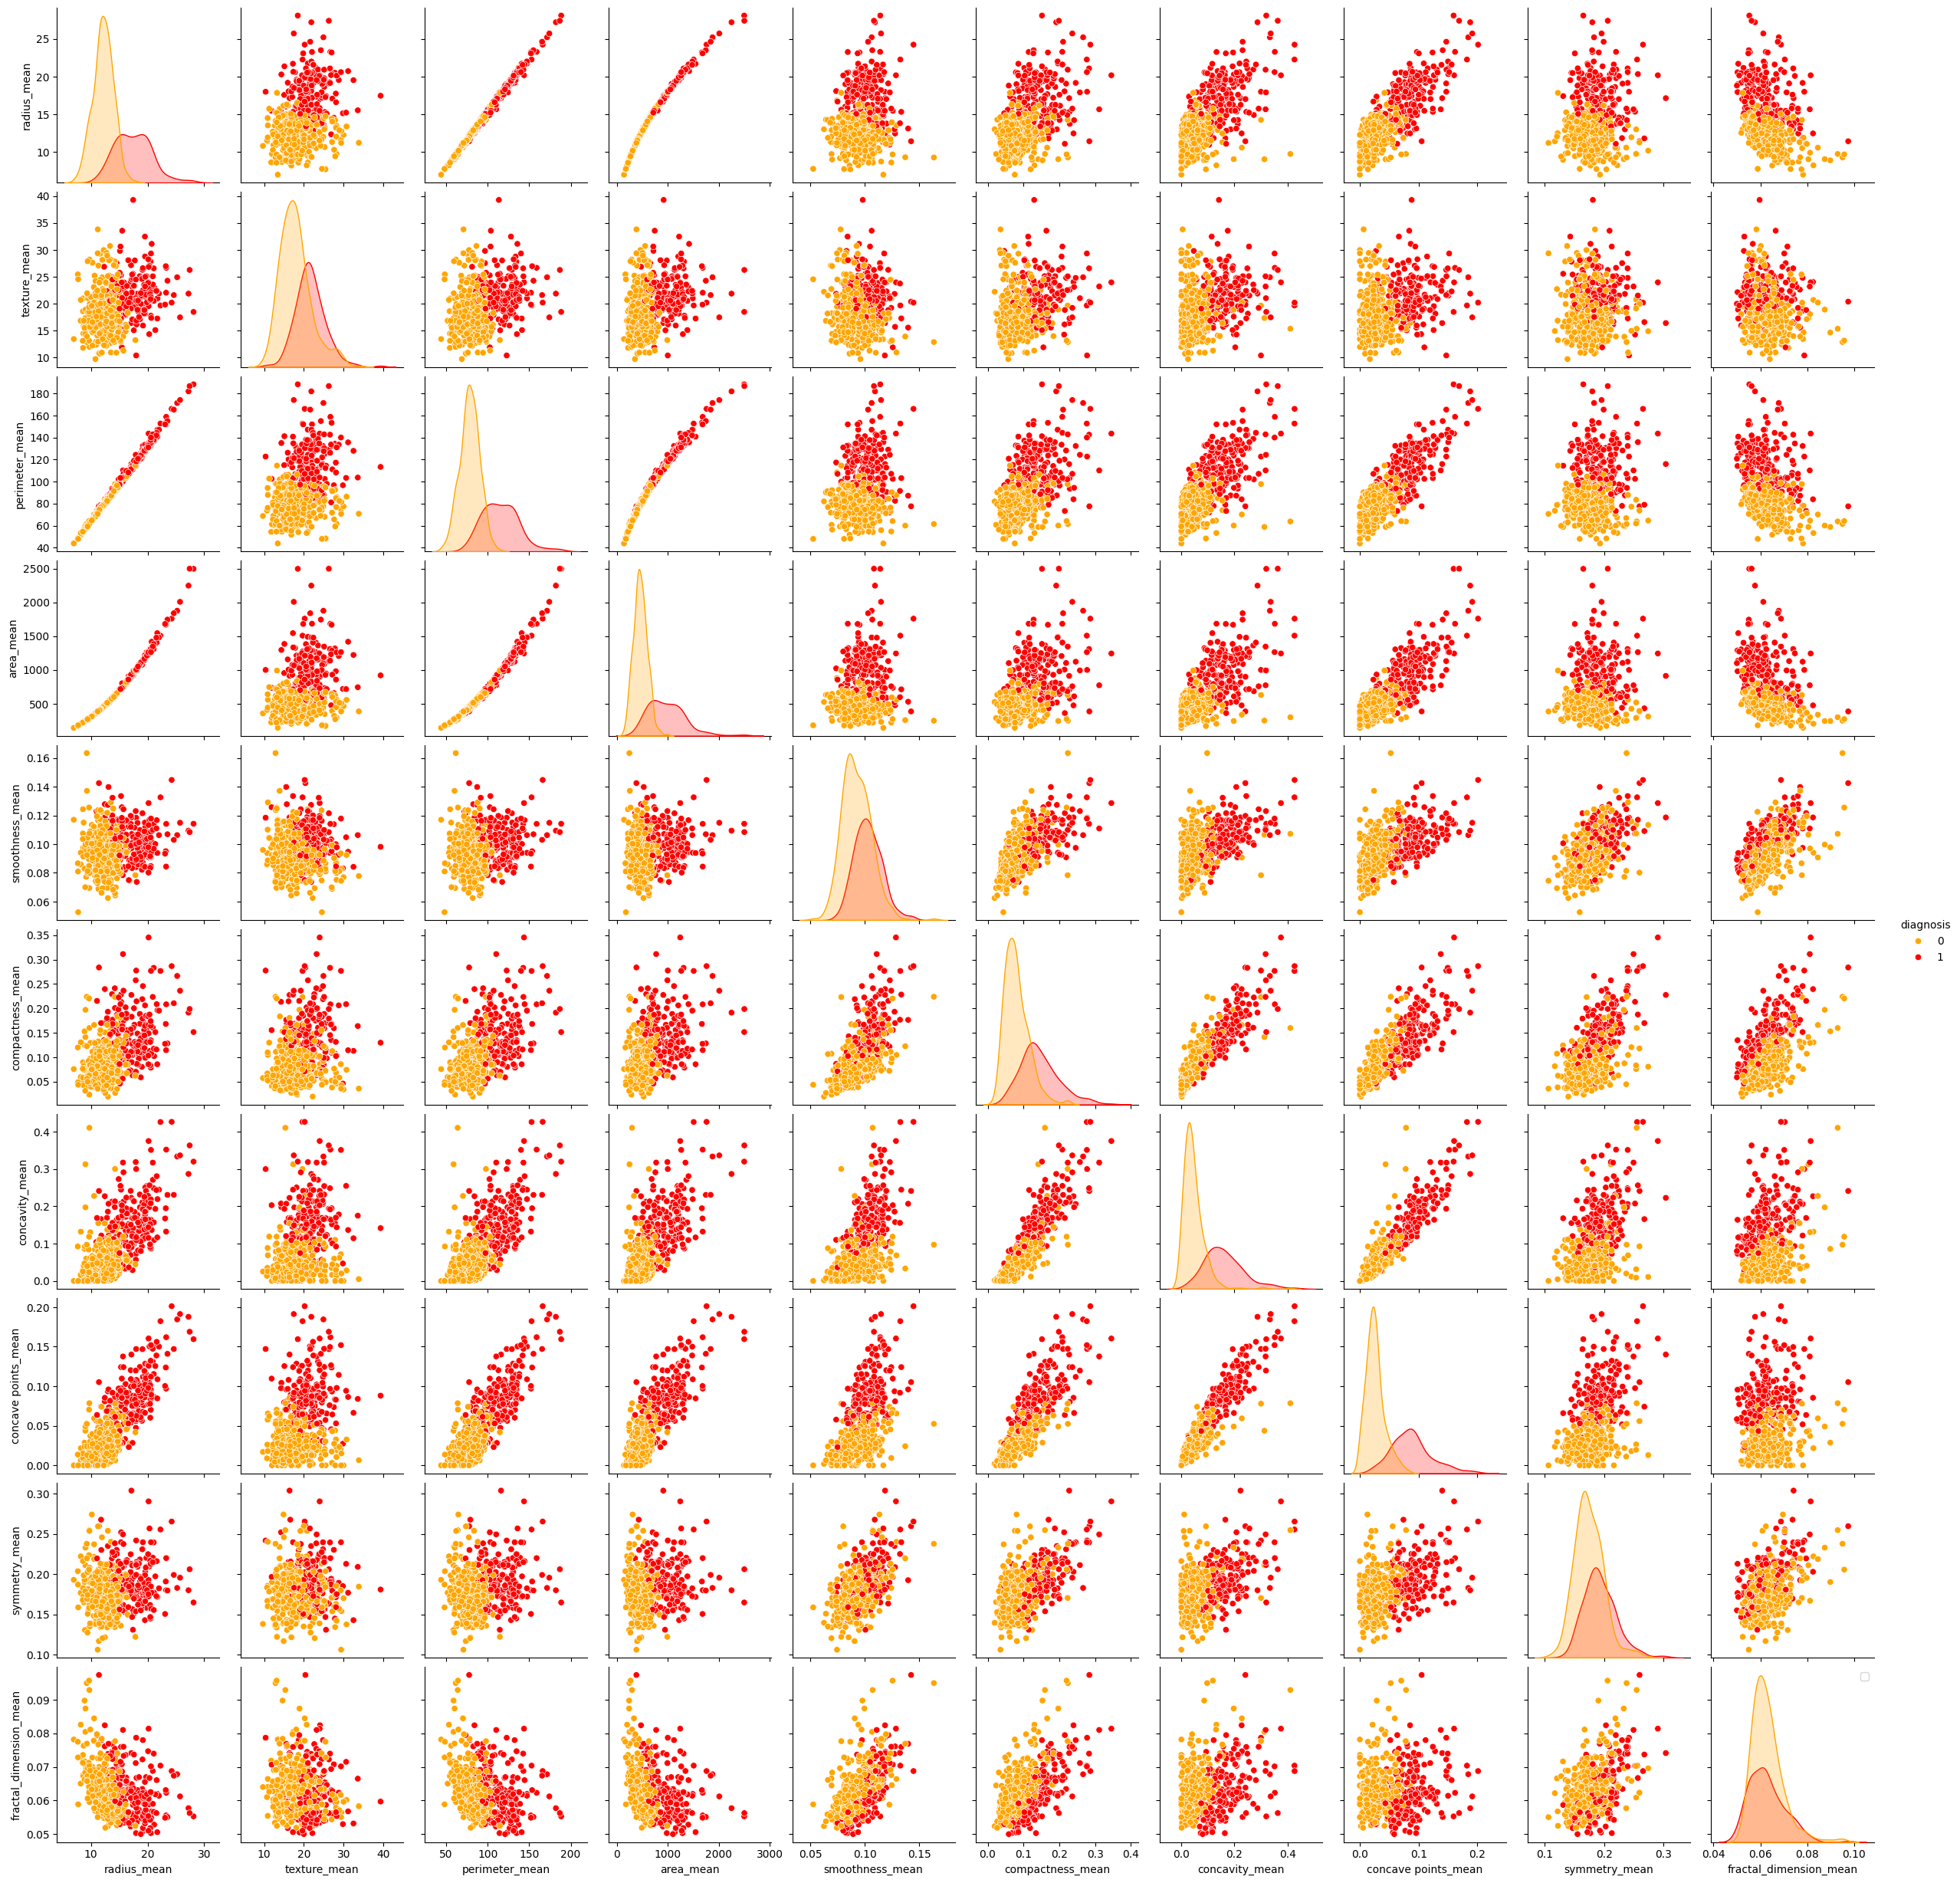

In [14]:
sns.pairplot(mean_features,hue ="diagnosis",palette = ["orange","red"])
plt.legend()

From the above visualisation we can have an approximate idea that for higher values of features the type of tumor is Cancerous.

- Looking for Correlations between different Features

<Axes: >

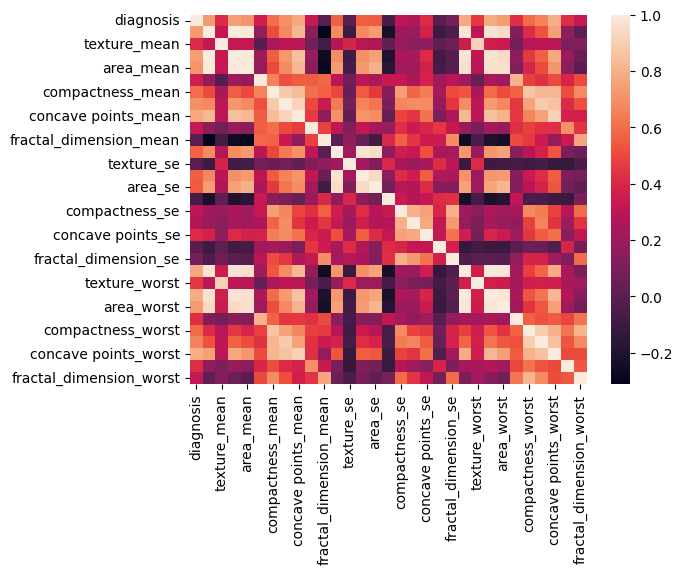

In [15]:
sns.heatmap(df.corr())

- Seperating out the Features having Correlation Coefficient greater than 0.5

In [16]:
corr_coef = df.corr()["diagnosis"]
optimal_features = corr_coef[abs(corr_coef)>0.5]
optimal_features 

diagnosis               1.000000
radius_mean             0.730029
perimeter_mean          0.742636
area_mean               0.708984
compactness_mean        0.596534
concavity_mean          0.696360
concave points_mean     0.776614
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
radius_worst            0.776454
perimeter_worst         0.782914
area_worst              0.733825
compactness_worst       0.590998
concavity_worst         0.659610
concave points_worst    0.793566
Name: diagnosis, dtype: float64